# Load and cut measurements from Equivital Sensor vest

Recordings of sensor vests are usually longer than needed. This notebook demonstrates how to check on measured cardiac activity during intervals of time during a recording to identify the interval of interest and cut the measurements down to that interval into a new set of csv files. 

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
%load_ext autoreload
%autoreload 1
%aimport qex

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
%reload_ext autoreload

In [37]:
demofile_loc = './demodata2/FullEQ/'
df_datafiles = qex.qiosk_recordings(demofile_loc)
df_datafiles 

,Signal,DevName,ID,Date,Session,FileName,FileType,FileSize,RecStart,RecEnd,...,ECGloc,SubjectNames,SENSOR ID,SUBJECT ID,HR(BPM),HRC(%),BELT OFF,LEAD OFF,MOTION,BODY POSITION
0,DATA,LS402,5022204,241203,0,DATA-LS402-5022204-24120300.CSV,csv,449043,2024-12-03 12:41:50+00:00,2024-12-04 10:57:50+00:00,...,./demodata2/FullEQ/ECG-LS402-5022204-24120300.csv,[LS402],5022204,LS402,73,98,0,1,Stationary,Side
1,DATA,WW501,5022238,241203,0,DATA-WW501-5022238-24120300.CSV,csv,448290,2024-12-03 12:42:19+00:00,2024-12-04 10:58:19+00:00,...,./demodata2/FullEQ/ECG-WW501-5022238-24120300.csv,[WW501],5022238,WW501,171,98,0,1,Stationary,Side


In [38]:
# singing -4.927	2024-12-03 17:29:36.544036054	 2024-12-03 17:37:06.576036054	
# dancing -5.0197	2024-12-03 20:55:07.422336054    2024-12-03 21:16:52.515236054	
# concert -4.2683   2024-12-03 20:30:08.173736054	 2024-12-03 20:55:38.244536054	

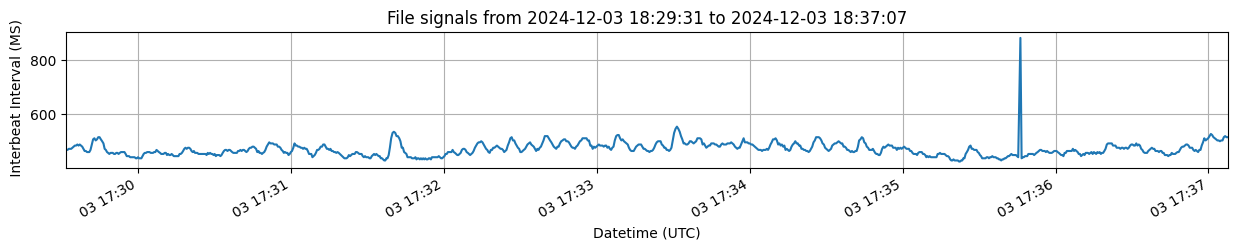

In [39]:
t1 = pd.to_datetime('2024-12-03 17:29:36.54+00:00') + pd.to_timedelta(-4.927,'s')

t2 = t1 + pd.to_timedelta(456.1018,'s')  #pd.to_datetime('2024-12-03 23:00:00+00:00')
t1_cet = t1.tz_convert(tz='Europe/Oslo')
t2_cet = t2.tz_convert(tz='Europe/Oslo')
recID = 1

# Check interval for suitable heart rate activity, inverted as IBIs
V = pd.read_csv(df_datafiles.loc[recID,'RRloc'])
qex.test_plot_signals_interval(V,t1_cet,t2_cet)


In [40]:
k = 1
t1 = pd.to_datetime('2024-12-03 17:29:36.54+00:00') + pd.to_timedelta(-4.927,'s')
t2 = t1 + pd.to_timedelta(456.1018,'s')
outfile_loc = './demodata2/EQ/'

for f in os.listdir(demofile_loc):
    if len(f)>5:
        newf = f[:-12]+str(int(f[-12:-4])+k)+f[-4:]
        a = qex.cut_by_time(demofile_loc + f,t1,t2)
        a.to_csv(outfile_loc+newf)


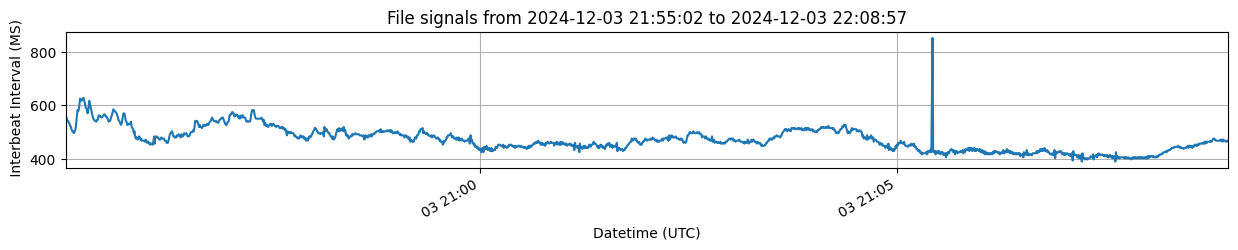

In [41]:
t1 = pd.to_datetime('2024-12-03 20:55:07.42+00:00') + pd.to_timedelta(-5.0197,'s')
# dancing -5.0197	2024-12-03 20:55:07.422336054    2024-12-03 21:16:52.515236054	
t2 = t1 + pd.to_timedelta(835.3711,'s') 
t1_cet = t1.tz_convert(tz='Europe/Oslo')
t2_cet = t2.tz_convert(tz='Europe/Oslo')
recID = 1

# Check interval for suitable heart rate activity, inverted as IBIs
V = pd.read_csv(df_datafiles.loc[recID,'RRloc'])
qex.test_plot_signals_interval(V,t1_cet,t2_cet)


In [42]:
k = 2
t1 = pd.to_datetime('2024-12-03 20:55:07.42+00:00') + pd.to_timedelta(-5.0197	,'s')
t2 = t1 + pd.to_timedelta(835.3711,'s') 
outfile_loc = './demodata2/EQ/'

for f in os.listdir(demofile_loc):
    if len(f)>5:
        newf = f[:-12]+str(int(f[-12:-4])+k)+f[-4:]
        a = qex.cut_by_time(demofile_loc + f,t1,t2)
        a.to_csv(outfile_loc+newf)


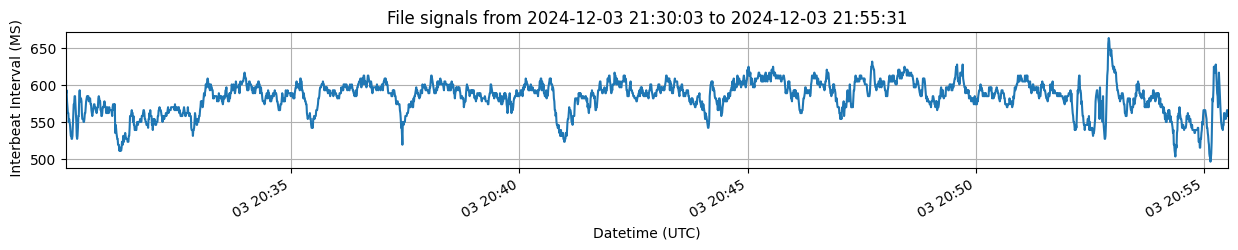

In [43]:
t1 = pd.to_datetime('2024-12-03 20:30:08.17+00:00') + pd.to_timedelta(-4.2683,'s')
# concert -4.2683   2024-12-03 20:30:08.173736054	 2024-12-03 20:55:38.244536054	
t2 = t1 + pd.to_timedelta(1527.58,'s') 
t1_cet = t1.tz_convert(tz='Europe/Oslo')
t2_cet = t2.tz_convert(tz='Europe/Oslo')
recID = 1

# Check interval for suitable heart rate activity, inverted as IBIs
V = pd.read_csv(df_datafiles.loc[recID,'RRloc'])
qex.test_plot_signals_interval(V,t1_cet,t2_cet)


In [44]:
k = 3
t1 = pd.to_datetime('2024-12-03 20:30:08.17+00:00') + pd.to_timedelta(-4.2683,'s')
# concert -4.2683   2024-12-03 20:30:08.173736054	 2024-12-03 20:55:38.244536054	
t2 = t1 + pd.to_timedelta(1527.58,'s') 
outfile_loc = './demodata2/EQ/'

for f in os.listdir(demofile_loc):
    if len(f)>5:
        newf = f[:-12]+str(int(f[-12:-4])+k)+f[-4:]
        a = qex.cut_by_time(demofile_loc + f,t1,t2)
        a.to_csv(outfile_loc+newf)


All the clipped files will be in the outfile_loc, with incremented session numbers.

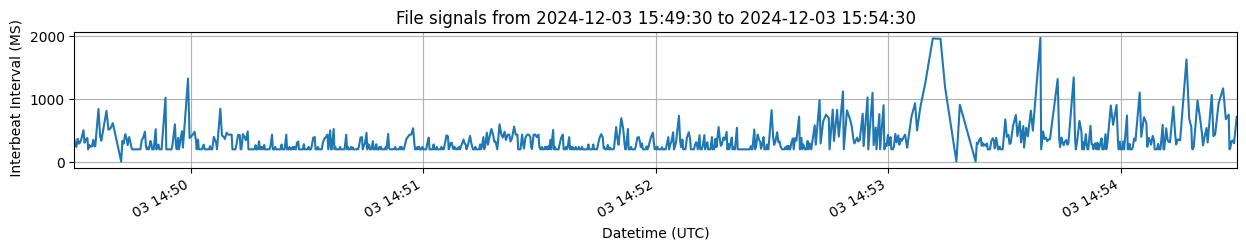

In [53]:
t1 = pd.to_datetime('2024-12-03 14:49:30+00:00')

t2 = t1 + pd.to_timedelta(300,'s')  #pd.to_datetime('2024-12-03 23:00:00+00:00')
t1_cet = t1.tz_convert(tz='Europe/Oslo')
t2_cet = t2.tz_convert(tz='Europe/Oslo')
recID = 1

# Check interval for suitable heart rate activity, inverted as IBIs`
V = pd.read_csv(df_datafiles.loc[recID,'RRloc'])
qex.test_plot_signals_interval(V,t1_cet,t2_cet)

In [55]:
k = 4
t1 = pd.to_datetime('2024-12-03 14:49:30+00:00')
t2 = t1 + pd.to_timedelta(300,'s')
outfile_loc = './demodata2/EQ/'

for f in os.listdir(demofile_loc):
    if len(f)>5:
        newf = f[:-12]+str(int(f[-12:-4])+k)+f[-4:]
        a = qex.cut_by_time(demofile_loc + f,t1,t2)
        a.to_csv(outfile_loc+newf)

Quick cropping:

    check if recording includes time interval in questions
    fix session suffix to session 10
    make and sort into folders per participant
    

In [61]:
data_url = 'https://raw.githubusercontent.com/finn42/Exploratory_Listening_Phys/refs/heads/main/data/Physiological_data/Case2_Sae1_AudResp.csv'
A=pd.read_csv(data_url,index_col=0)

In [62]:
A

,AU807,AU805,AU802,AU806,AU812,AU803,AU808,AU813,AU814,AU811,AU804,AU810,AU809,AU801,AU815
-15.000,648.463164,501.386331,556.577790,509.000000,498.000000,499.264969,505.000000,504.940159,486.685828,502.654172,485.000000,504.000000,515.740177,520.627392,483.645305
-14.960,634.311033,502.401672,558.943608,509.000000,498.000000,501.316251,504.829054,502.888877,486.000000,503.000000,484.947003,504.311972,517.531636,527.806879,484.000000
-14.920,621.210185,503.411972,562.360708,509.000000,498.709408,503.367533,504.000000,500.918797,485.652131,503.696587,484.000000,504.662387,518.791459,534.418833,484.000000
-14.880,608.902492,504.000000,566.097454,509.796587,499.000000,505.418815,504.000000,499.893156,485.000000,504.000000,484.000000,504.354172,519.817100,538.925849,484.720381
-14.840,596.594800,504.000000,569.174377,509.177772,499.760690,508.205146,504.000000,498.867515,485.000000,504.000000,484.000000,505.000000,520.000000,541.332485,485.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475.252,496.349567,480.535915,533.000000,501.411954,505.240177,486.535031,499.339310,528.465828,488.000000,500.303413,484.533328,497.188028,493.204279,447.804279,551.814572
475.292,494.647851,483.612838,533.000000,499.680336,506.531636,484.483749,499.000000,528.000000,489.039328,499.277772,483.042723,496.162387,494.000000,447.190828,555.996605
475.332,493.298285,485.793174,533.155164,499.000000,508.291459,482.716233,499.000000,528.573510,491.090610,499.000000,481.495721,495.136746,494.255562,447.829921,559.049585
475.372,493.000000,486.000000,534.178638,499.000000,509.000000,482.309408,499.737613,529.599151,493.283785,498.228468,481.000000,494.111105,495.000000,448.000000,561.151300
